In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = '/content/drive/MyDrive/Colab/NU/CIVE7381/PS4'

In [3]:
dF4 = pd.read_excel(file_path + '/PS4_data.xlsx', sheet_name='Boston_TAZ_Data1')
dF4 = dF4.rename(columns={'Zone ID': 'Zone_ID'})

dF4.head()

,Zone_ID,HBW_a,Total_Emp,Srv_Emp,Ret_Emp,Bas_Emp,K12_Emp,Coll_Emp,HH
0,1,3639.568973,3522,3492,5,6,0,0,0
1,2,3008.900823,2022,2301,331,63,0,0,4
2,3,4731.294826,3533,2643,400,722,0,0,198
3,4,1942.327944,1442,1557,59,137,0,0,114
4,5,164.051493,125,97,24,3,0,0,1173


In [4]:
relevant_columns = dF4.drop(columns=['Zone_ID'])
relevant_columns.describe()

,HBW_a,Total_Emp,Srv_Emp,Ret_Emp,Bas_Emp,K12_Emp,Coll_Emp,HH
count,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000
mean,1113.883343,878.082508,558.323799,155.811881,190.861019,45.297396,37.695636,657.966997
std,1388.731627,1124.752877,958.279870,242.731325,392.887037,81.933835,257.651080,423.375389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,343.974626,275.500000,141.000000,21.000000,25.000000,0.000000,0.000000,338.500000
50%,685.879005,547.000000,295.000000,70.000000,63.000000,0.000000,0.000000,663.000000
75%,1346.539581,1030.500000,593.000000,192.000000,174.500000,67.000000,0.000000,949.500000
max,15074.108240,12953.000000,12975.000000,3016.000000,7652.000000,647.000000,7225.000000,2547.000000


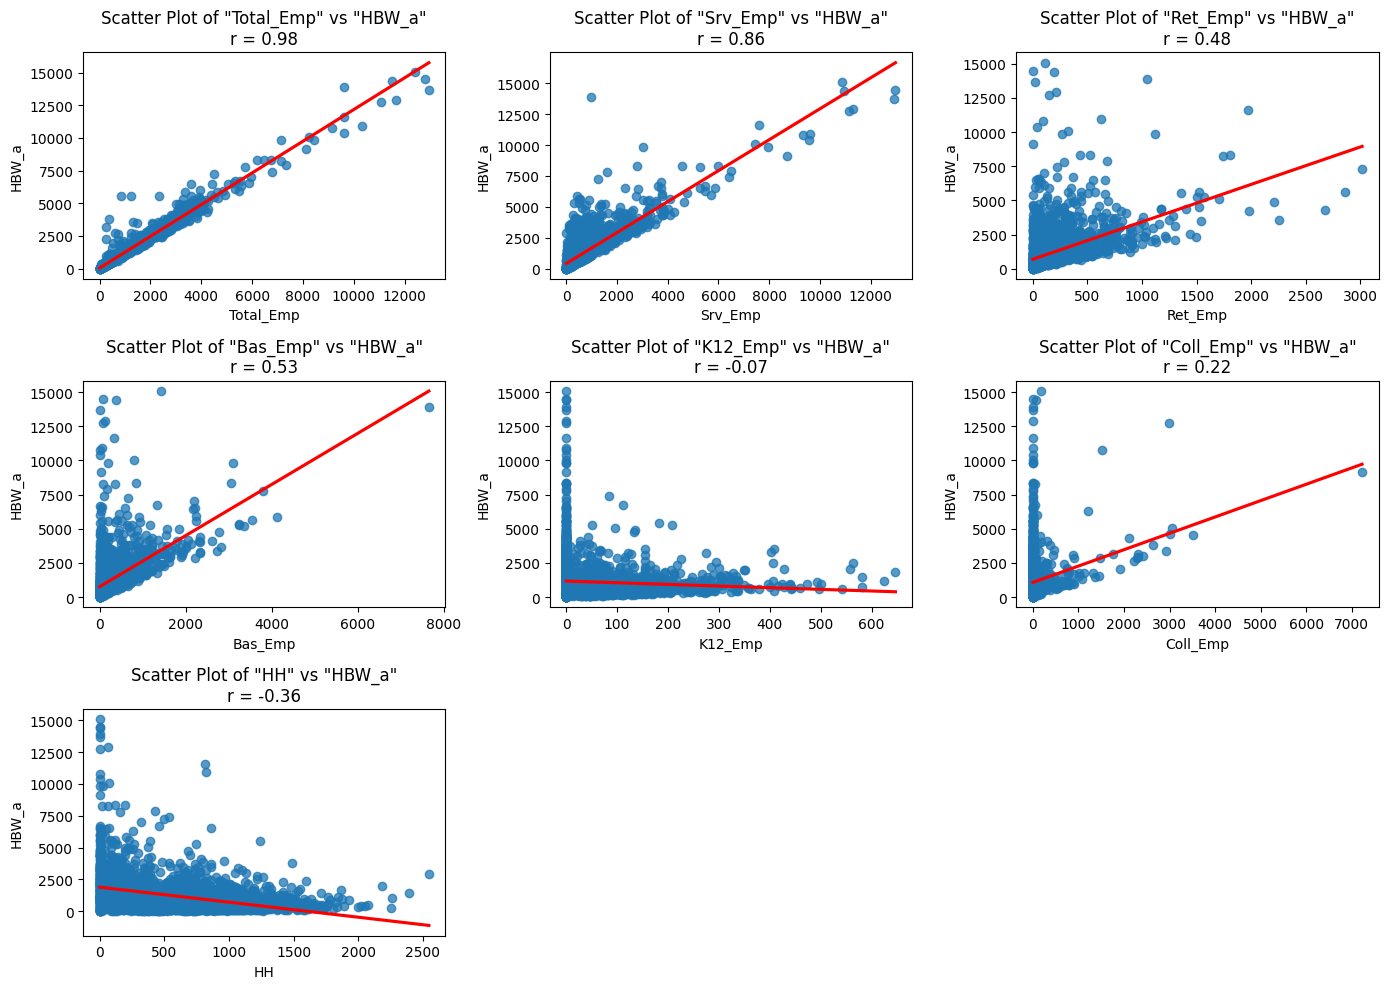

In [5]:
# Scatter plots

independent_variables = relevant_columns.drop(columns='HBW_a')
plt.figure(figsize=(14, 10))

for i, var in enumerate(independent_variables, 1):
    plt.subplot(3, 3, i)

    # Scatter plot with regression line
    sns.regplot(x=dF4[var], y=dF4['HBW_a'], scatter_kws={'alpha': 0.75}, line_kws={'color': 'red'}, ci=None)

    # Calc. correlation coefficient
    r, _ = pearsonr(dF4[var], dF4['HBW_a'])

    plt.title(f'Scatter Plot of "{var}" vs "HBW_a"\nr = {r:.2f}')
    plt.xlabel(var)
    plt.ylabel('HBW_a')

plt.tight_layout()
plt.show()

In [6]:
# Missing values
dF4.isnull().sum().to_frame().transpose()

,Zone_ID,HBW_a,Total_Emp,Srv_Emp,Ret_Emp,Bas_Emp,K12_Emp,Coll_Emp,HH
0,0,0,0,0,0,0,0,0,0


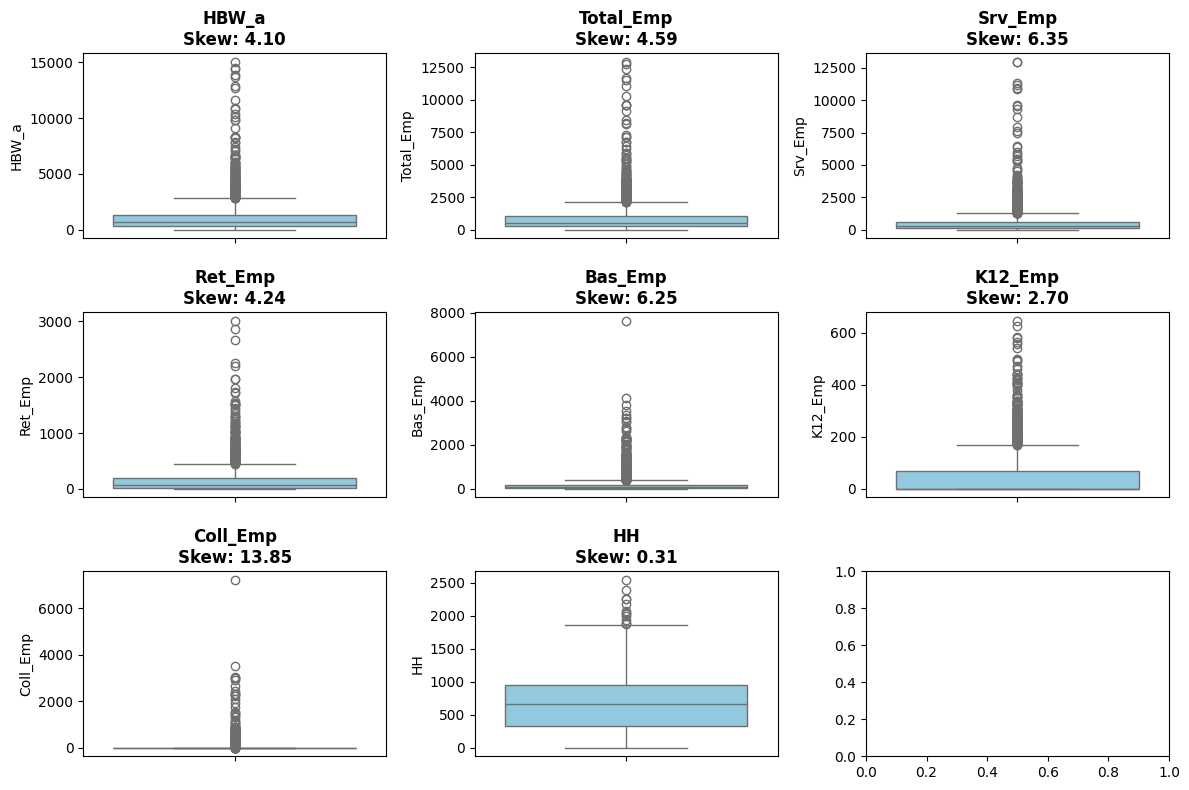

In [7]:
# Boxplot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(relevant_columns.columns):
    sns.boxplot(data=dF4, y=var, ax=axes[i], color="skyblue")
    axes[i].set_title(f'{var}\nSkew: {dF4[var].skew():.2f}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

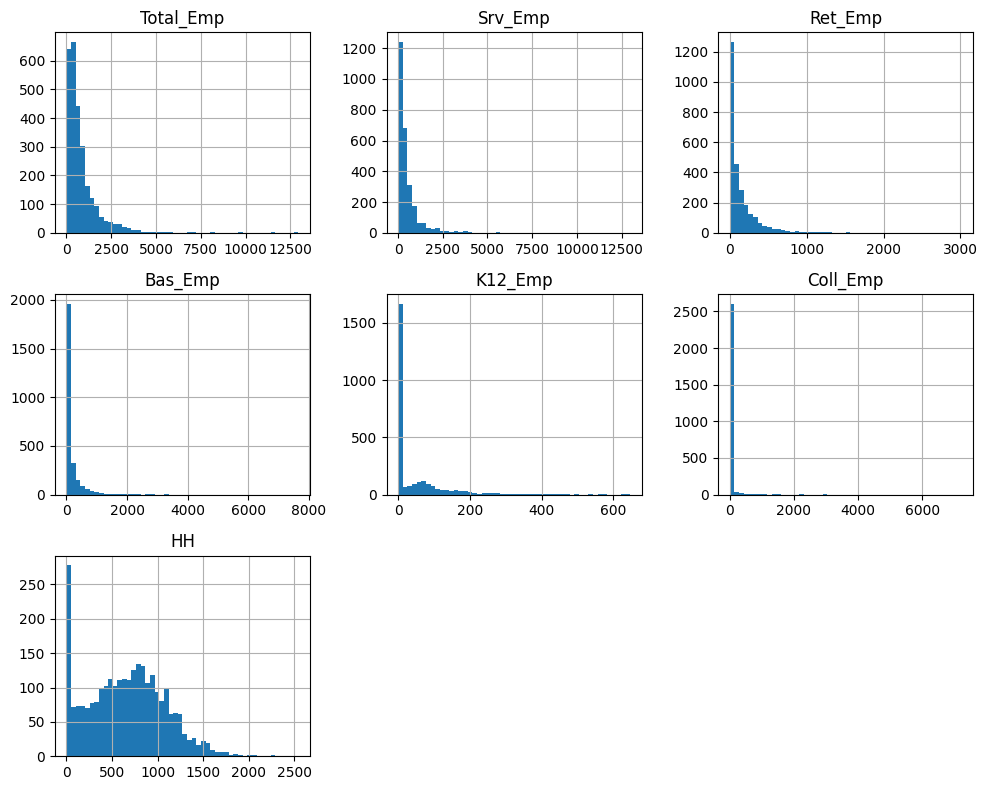

In [8]:
# Histogram

dF4[independent_variables.columns].hist(figsize=(10,8), layout=(3,3), bins=50)
plt.tight_layout()
plt.show()

In [9]:
# Correlation matrix
correlation_matrix = relevant_columns.corr()
correlation_matrix

,HBW_a,Total_Emp,Srv_Emp,Ret_Emp,Bas_Emp,K12_Emp,Coll_Emp,HH
HBW_a,1.000000,0.982420,0.863815,0.478933,0.529415,-0.071450,0.222219,-0.360245
Total_Emp,0.982420,1.000000,0.896748,0.410514,0.477067,-0.056402,0.243263,-0.343383
Srv_Emp,0.863815,0.896748,1.000000,0.169766,0.122087,0.000302,0.329729,-0.264610
Ret_Emp,0.478933,0.410514,0.169766,1.000000,0.215712,-0.125661,-0.035015,-0.261633
Bas_Emp,0.529415,0.477067,0.122087,0.215712,1.000000,-0.104925,-0.050850,-0.234178
K12_Emp,-0.071450,-0.056402,0.000302,-0.125661,-0.104925,1.000000,-0.045654,0.111738
Coll_Emp,0.222219,0.243263,0.329729,-0.035015,-0.050850,-0.045654,1.000000,-0.150813
HH,-0.360245,-0.343383,-0.264610,-0.261633,-0.234178,0.111738,-0.150813,1.000000


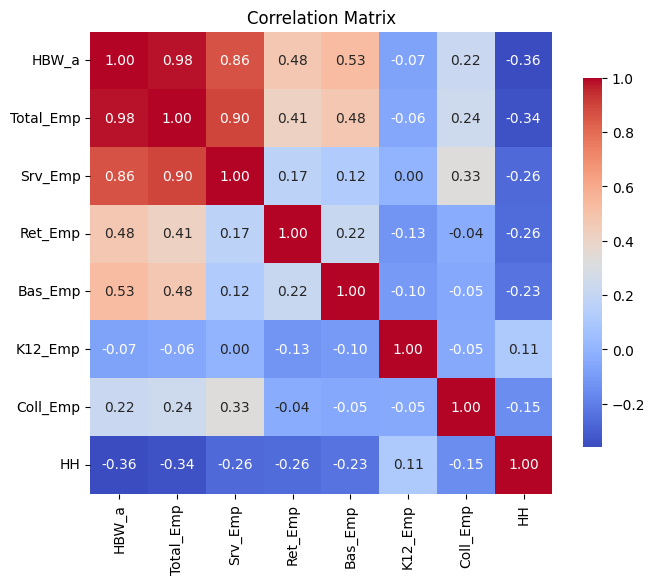

In [10]:
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Predictor variables
X_all = dF4[['Total_Emp', 'Srv_Emp', 'Ret_Emp', 'Bas_Emp', 'K12_Emp', 'Coll_Emp', 'HH']]
X_all = sm.add_constant(X_all)

X_high_corr = dF4[['Total_Emp', 'Srv_Emp', 'Ret_Emp', 'Bas_Emp']]
X_high_corr = sm.add_constant(X_high_corr)

X_total_emp = dF4[['Total_Emp']]
X_total_emp = sm.add_constant(X_total_emp)

# Response variable
y = dF4['HBW_a']

# Fit models for all variable sets
model_all = sm.OLS(y, X_all).fit()
model_high_corr = sm.OLS(y, X_high_corr).fit()
model_total_emp = sm.OLS(y, X_total_emp).fit()

# Print the summaries
summary_all = model_all.summary()
summary_high_corr = model_high_corr.summary()
summary_total_emp = model_total_emp.summary()

# Corrected print statement for model summaries
print("Model 1: Using all variables\n", summary_all)
print("\nModel 2: Using high correlation variables\n", summary_high_corr)
print("\nModel 3: Using only Total Employment\n", summary_total_emp)

Model 1: Using all variables
                             OLS Regression Results                            
Dep. Variable:                  HBW_a   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.438e+04
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:37:15   Log-Likelihood:                -16430.
No. Observations:                2727   AIC:                         3.288e+04
Df Residuals:                    2719   BIC:                         3.292e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6297 

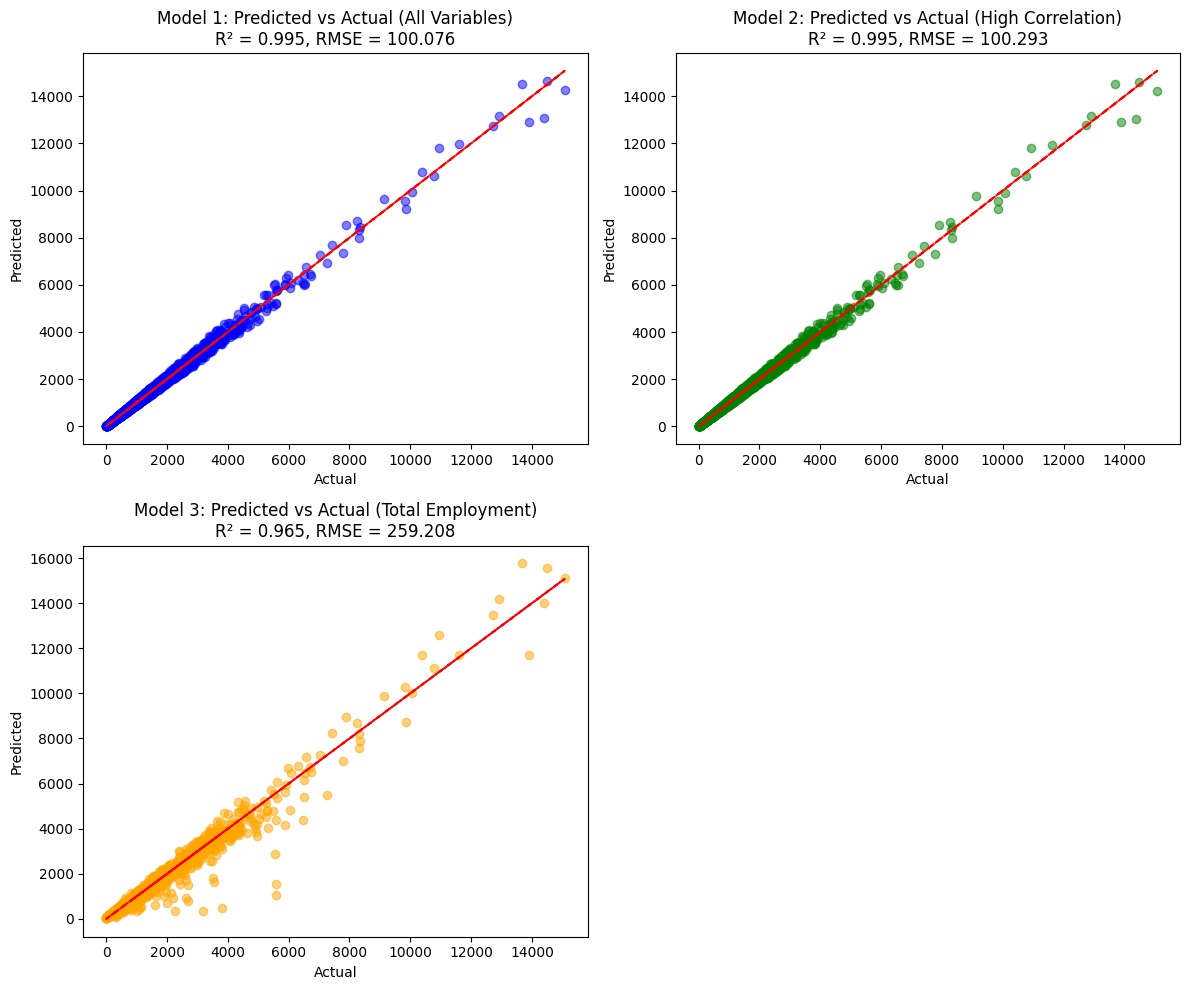

In [12]:
# Get predicted values from each model
predicted_all = model_all.predict(X_all)
predicted_high_corr = model_high_corr.predict(X_high_corr)
predicted_total_emp = model_total_emp.predict(X_total_emp)

# Function to calculate R-squared and RMSE
def calculate_metrics(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (ss_res / ss_tot)
    rmse = np.sqrt(np.mean(residuals**2))
    return r_squared, rmse

# Calculate metrics for each model
metrics_all = calculate_metrics(y, predicted_all)
metrics_high_corr = calculate_metrics(y, predicted_high_corr)
metrics_total_emp = calculate_metrics(y, predicted_total_emp)

# Create subplots for predicted vs actual
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Model 1: All Variables
axs[0].scatter(y, predicted_all, color='blue', alpha=0.5)
axs[0].plot(y, y, color='red', linestyle='--')  # 45-degree line
axs[0].set_title(f"Model 1: Predicted vs Actual (All Variables)\nR² = {metrics_all[0]:.3f}, RMSE = {metrics_all[1]:.3f}")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")

# Model 2: High Correlation Variables
axs[1].scatter(y, predicted_high_corr, color='green', alpha=0.5)
axs[1].plot(y, y, color='red', linestyle='--')
axs[1].set_title(f"Model 2: Predicted vs Actual (High Correlation)\nR² = {metrics_high_corr[0]:.3f}, RMSE = {metrics_high_corr[1]:.3f}")
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")

# Model 3: Total Employment Only
axs[2].scatter(y, predicted_total_emp, color='orange', alpha=0.5)
axs[2].plot(y, y, color='red', linestyle='--')
axs[2].set_title(f"Model 3: Predicted vs Actual (Total Employment)\nR² = {metrics_total_emp[0]:.3f}, RMSE = {metrics_total_emp[1]:.3f}")
axs[2].set_xlabel("Actual")
axs[2].set_ylabel("Predicted")

# Hide empty subplot
axs[3].axis('off')

plt.tight_layout()
plt.show()